In [2]:
#first step we are going to import all the necessary library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#now we are getting the datasets

train = pd.read_csv("D:/Projects/Hand Gesture Recognition/dataset/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("D:/Projects/Hand Gesture Recognition/dataset/sign_mnist_test/sign_mnist_test.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
#checking the labels 

labels = train['label'].values
label_arr = np.array(labels)
np.unique(label_arr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

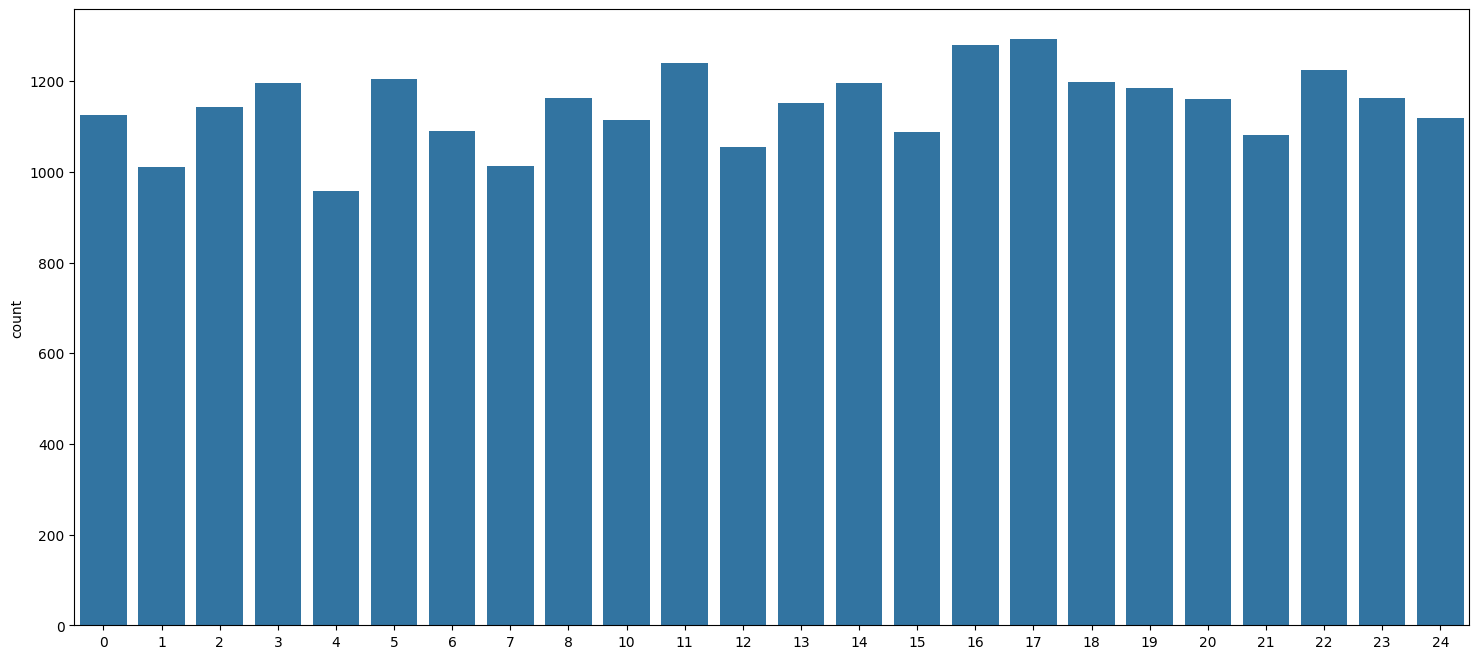

In [6]:
#visualize the labels

plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [7]:
#now we have to remove the labels from the dataset 

train.drop('label', axis=1, inplace=True)

In [8]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
#here we convert the data

images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
#encoding our datas

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


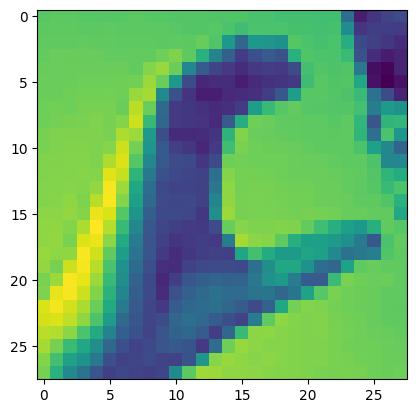

In [12]:
#check the image

index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
#create xtest, ytest, xtrain, ytrain

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [14]:
#import cnn models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 20

In [15]:
#Scale the images

x_train = x_train / 255
x_test = x_test / 255


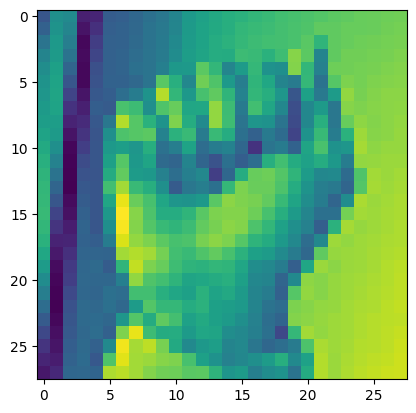

In [16]:
#Reshape the images

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [17]:
#train the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

images = images.reshape(-1, 28, 28, 1)


model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)



Epoch 1/20
151/151 [==============================] - 22s 132ms/step - loss: 2.7309 - accuracy: 0.1603 - val_loss: 1.8039 - val_accuracy: 0.4271
Epoch 2/20
151/151 [==============================] - 17s 113ms/step - loss: 1.3610 - accuracy: 0.5425 - val_loss: 0.8369 - val_accuracy: 0.7301
Epoch 3/20
151/151 [==============================] - 15s 101ms/step - loss: 0.7756 - accuracy: 0.7329 - val_loss: 0.6193 - val_accuracy: 0.7888
Epoch 4/20
151/151 [==============================] - 16s 104ms/step - loss: 0.5220 - accuracy: 0.8233 - val_loss: 0.3424 - val_accuracy: 0.8886
Epoch 5/20
151/151 [==============================] - 15s 99ms/step - loss: 0.3557 - accuracy: 0.8781 - val_loss: 0.2059 - val_accuracy: 0.9389
Epoch 6/20
151/151 [==============================] - 16s 103ms/step - loss: 0.2550 - accuracy: 0.9124 - val_loss: 0.1476 - val_accuracy: 0.9597
Epoch 7/20
151/151 [==============================] - 14s 96ms/step - loss: 0.1826 - accuracy: 0.9393 - val_loss: 0.0891 - val_accu

In [18]:
#save the model
model.save("sign_mnist_cnn_20_Epochs.h5")
print("model saved")

model saved


c:\Users\mguru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


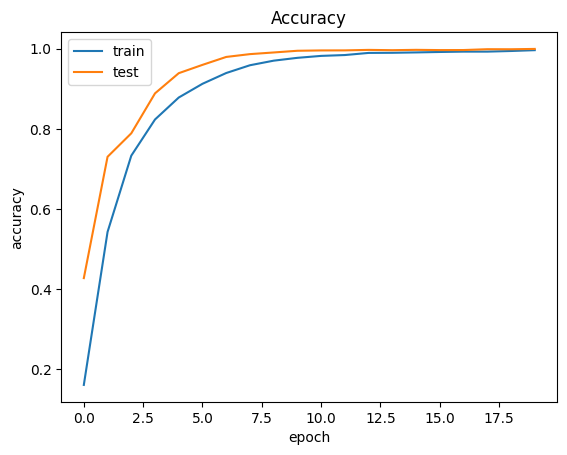

In [19]:
#accuracy visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [20]:
#evaluate the model in the unseen data 

test_labels = test['label']
test.drop('label', axis=1, inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 1s 6ms/step


In [21]:
#check accuracy on the unseen data

from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8551310652537646

In [22]:
#mapping the letters

def letter(result):
    letter_labels = {
        0 : 'A',
        1 : 'B',
        2 : 'C',
        3 : 'D',
        4 : 'E', 
        5 : 'F',
        6 : 'G',
        7 : 'H',
        8 : 'I',
        9 : 'K',
        10 : 'L',
        11 : 'M',
        12 : 'N',
        13 : 'O',
        14 : 'P',
        15 : 'Q',
        16 : 'R',
        17 : 'S',
        18 : 'T',
        19 : 'U',
        20 : 'V',
        21 : 'W',
        22 : 'X',
        23 : 'Y',
    }

    try:
        res = int(result)
        return letter_labels[res]
    except:
        return 'Error'

In [23]:
import cv2
import numpy as np


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and grey', roi)
    
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    roi = roi.reshape(1, 28, 28, 1)

    result = np.argmax(model.predict(roi), axis=-1)
    result = str(result[0])
    
    cv2.putText(copy, letter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 